<a href="https://colab.research.google.com/github/tewei0328/backtest/blob/main/5_%E8%82%A1%E5%83%B9%E5%9C%96%2BRSI%E6%8C%87%E6%A8%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#參考資料: 用 Python 快速計算 158 種技術指標！
https://medium.com/ai%E8%82%A1%E4%BB%94/%E7%94%A8-python-%E5%BF%AB%E9%80%9F%E8%A8%88%E7%AE%97-158-%E7%A8%AE%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99-26f9579b8f3a

#1.安裝TA-lib

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

#2.載入TA-Lib等套件 

In [3]:
import numpy as np
import pandas as pd
import talib

In [4]:
# 透過『get_functions』語法，查看 TA-Lib 提供的所有技術指標的代碼
all_ta_label = talib.get_functions()
# 看一下清單
all_ta_label
# 共有 158 個技術指標可以運算
len(all_ta_label)

158

In [5]:
# 透過『get_function_groups』，取得分類後的技術指標清單
all_ta_groups = talib.get_function_groups()
# 看一下這個字典
all_ta_groups
# 有哪些大類別？
all_ta_groups.keys()
# 查看某類別底下的技術指標清單
all_ta_groups['Momentum Indicators']
# 查看所有類別的指標數量
table = pd.DataFrame({
            '技術指標類別名稱': list(all_ta_groups.keys()),
            '該類別指標總數': list(map(lambda x: len(x), all_ta_groups.values()))
        })
table

,技術指標類別名稱,該類別指標總數
0,Cycle Indicators,5
1,Math Operators,11
2,Math Transform,15
3,Momentum Indicators,30
4,Overlap Studies,17
5,Pattern Recognition,61
6,Price Transform,4
7,Statistic Functions,9
8,Volatility Indicators,3
9,Volume Indicators,3


#4.用Remote Data Access爬蟲台積電股價

In [6]:
import pandas_datareader as pdr
df = pdr.DataReader('2330.TW', 'yahoo')

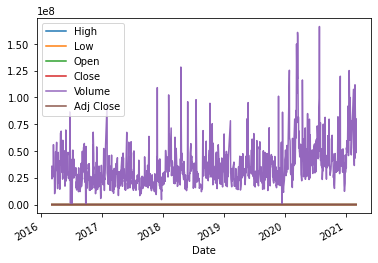

In [7]:
df.plot()

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-08,152.0,149.5,151.0,152.0,35683000.0,126.634277
2016-03-09,153.0,150.5,152.0,153.0,24004000.0,127.467392
2016-03-10,154.5,151.5,153.0,154.5,28302000.0,128.717087
2016-03-11,155.0,153.0,154.5,155.0,29566000.0,129.133667
2016-03-14,157.5,155.5,156.5,156.0,32751000.0,129.966751


##5.用TA-Lib計算ADX指標

In [9]:
talib.ADX(df.High, df.Low, df.Close, timeperiod = 14)

Date
2016-03-08          NaN
2016-03-09          NaN
2016-03-10          NaN
2016-03-11          NaN
2016-03-14          NaN
                ...    
2021-02-26    37.561133
2021-03-02    35.011146
2021-03-03    32.780134
2021-03-04    30.708480
2021-03-05    29.609851
Length: 1217, dtype: float64

In [10]:
adx=talib.ADX(df.High, df.Low, df.Close, timeperiod = 14)

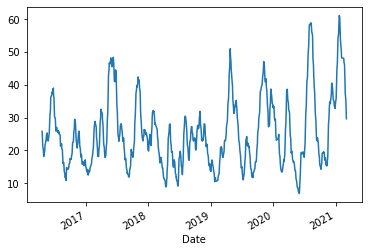

In [11]:
adx.plot()

##6.用TA-Lib計算RSI指標

In [12]:
rsi=talib.RSI(df.Close) # 天數參數採用預設值 14 天

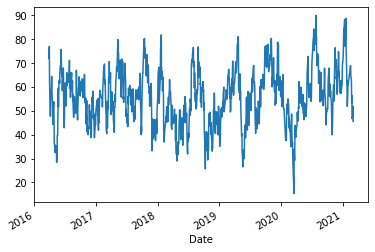

In [13]:
rsi.plot()

##7.股價圖+RSI指標

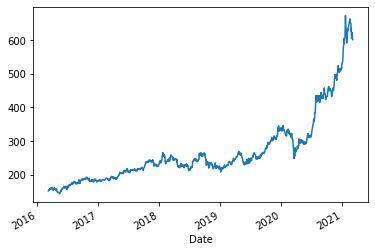

In [15]:
df.Close.plot()

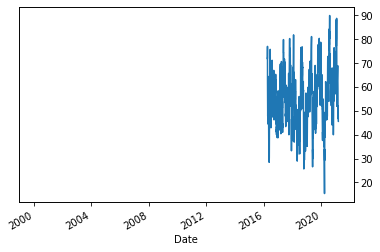

In [16]:
rsi.plot(secondary_y=True)

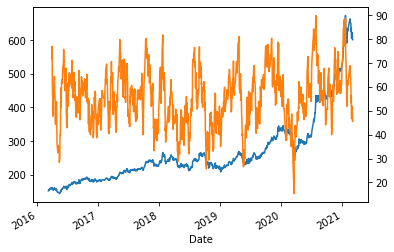

In [17]:
df.Close.plot()
rsi.plot(secondary_y=True)

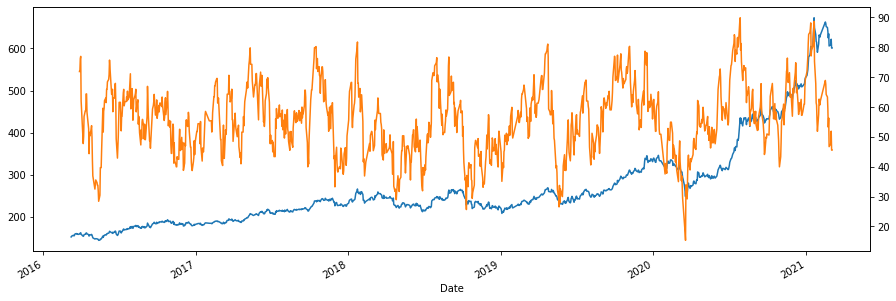

In [23]:
df.Close.plot(figsize=(15,5))
rsi.plot(secondary_y=True)